<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Комментарии-студента:-№1" data-toc-modified-id="Комментарии-студента:-№1-0.1">Комментарии студента: №1</a></span></li></ul></li><li><span><a href="#Анализ-заведений-питания-в-г.-Москве" data-toc-modified-id="Анализ-заведений-питания-в-г.-Москве-1">Анализ заведений питания в г. Москве</a></span><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1.1">Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2">Описание данных</a></span></li></ul></li><li><span><a href="#Загрузите-данных-и-изучение-общей-информации" data-toc-modified-id="Загрузите-данных-и-изучение-общей-информации-2">Загрузите данных и изучение общей информации</a></span></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-3">Выводы:</a></span></li><li><span><a href="#Колонка-chain" data-toc-modified-id="Колонка-chain-4">Колонка <code>chain</code></a></span></li><li><span><a href="#Колонка-hours" data-toc-modified-id="Колонка-hours-5">Колонка <code>hours</code></a></span></li><li><span><a href="#Создать-столбец-street" data-toc-modified-id="Создать-столбец-street-6">Создать столбец <code>street</code></a></span></li><li><span><a href="#Столбец-is_24/7" data-toc-modified-id="Столбец-is_24/7-7">Столбец <code>is_24/7</code></a></span></li></ul></div>

<div class="alert alert-info">
    
    
### Комментарии студента: №1
    

<p>Приветствую. Меня зовут Бондаренко Артем.
    </p>
</div>

## Анализ заведений питания в г. Москве

### Описание проекта

Инвесторам фонда «Shut Up and Take My Money» необходимо открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.

При исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.


### Описание данных
Доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

- `name` — название заведения;
- `address` — адрес заведения;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `lat` — широта географической точки, в которой находится заведение;
- `lng` — долгота географической точки, в которой находится заведение;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки);
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `seats` — количество посадочных мест.


**Цели иследования**:


**Основные этапы работы**:
1. Откройте файл с данными и изучите общую информацию
2. Подготовка данных
3. Изучение и проверка данных
4. Изучите воронку событий
5. Изучите результаты эксперимента

## Загрузите данных и изучение общей информации

Импортировние библиотек и настройка

In [96]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Импортирование библиотек
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sn


# настройки для DataFrame
pd.options.display.max_colwidth = 1
pd.options.display.max_columns = None

загрузка данных

In [97]:
filepath = '/datasets/moscow_places.csv'


try:
    df= pd.read_csv(filepath)
except:
    df = pd.read_csv('https://code.s3.yandex.net' + filepath)

df.head()
print(f'В данных содержится {df.shape[0]} строк и {df.shape[1]} колонок')

В данных содержится 8406 строк и 14 колонок


In [98]:
df.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


In [100]:
Из 14 колонок: 1 с числовым значением, 6 с плавющей точкой и 7 колонок типа object

SyntaxError: invalid syntax (3295495217.py, line 1)

In [101]:
df.describe()

,lat,lng,rating,middle_avg_bill,middle_coffee_cup,chain,seats
count,8406.000000,8406.000000,8406.000000,3149.000000,535.000000,8406.000000,4795.000000
mean,55.750109,37.608570,4.229895,958.053668,174.721495,0.381275,108.421689
std,0.069658,0.098597,0.470348,1009.732845,88.951103,0.485729,122.833396
min,55.573942,37.355651,1.000000,0.000000,60.000000,0.000000,0.000000
25%,55.705155,37.538583,4.100000,375.000000,124.500000,0.000000,40.000000
50%,55.753425,37.605246,4.300000,750.000000,169.000000,0.000000,75.000000
75%,55.795041,37.664792,4.400000,1250.000000,225.000000,1.000000,140.000000
max,55.928943,37.874466,5.000000,35000.000000,1568.000000,1.000000,1288.000000


In [102]:
df.describe(include='object')

,name,category,address,district,hours,price,avg_bill
count,8406,8406,8406,8406,7870,3315,3816
unique,5614,8,5753,9,1307,4,897
top,Кафе,кафе,"Москва, проспект Вернадского, 86В",Центральный административный округ,"ежедневно, 10:00–22:00",средние,Средний счёт:1000–1500 ₽
freq,189,2378,28,2242,759,2117,241


Присутствуют пропущенные значения в колонках, отрицательных значений нету. Возможны в некоторых колонках выбросы по значениям, которые в дальнейшем нужно будет проверить. Названия колонок приведены к общему виду.

In [103]:
df_category = df.pivot_table(index=['category'], values=['name','seats'], aggfunc=['count','sum']).reset_index()
df_category.columns =['category','names', 'seats', 'seats_sum']
fig = px.histogram(df_category, x='category', y='names',color='category', text_auto=True,
            height=600)
fig.update_layout(title='Количество обьектов по категориям',
                   xaxis_title='Категории обьектов',
                   yaxis_title='Количество')
fig.show();


In [104]:
df.price.unique()

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

Представлено 8 категорий заведений общественного питания, преобладают кафе и рестораны.

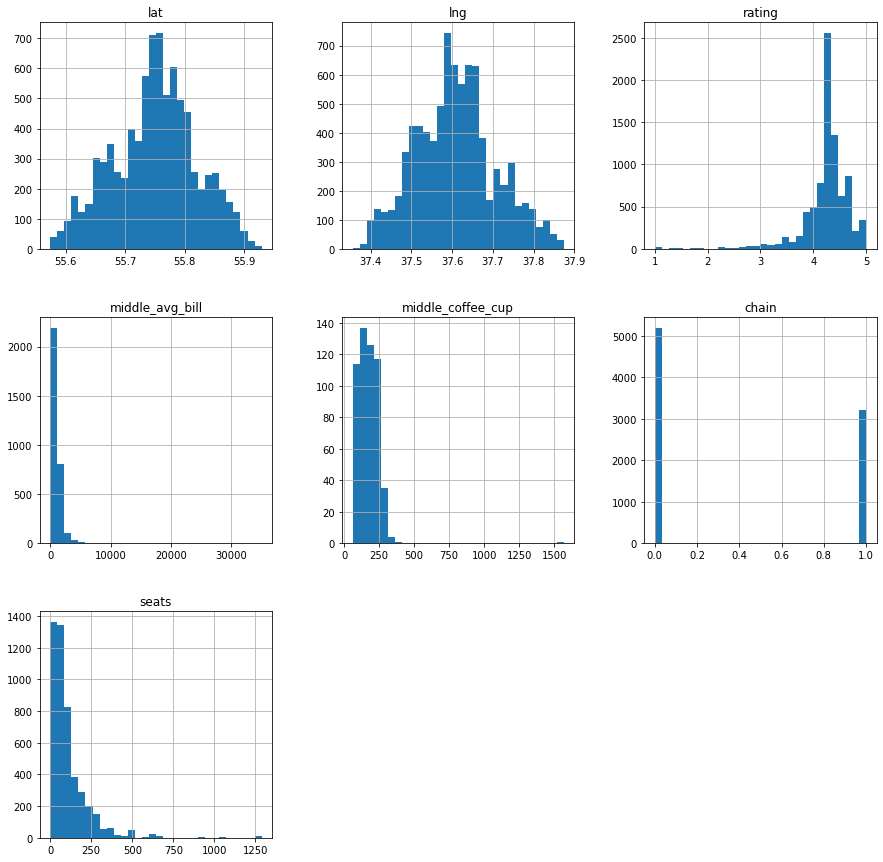

In [105]:
df.hist(bins=30, figsize=(15, 15));

Если расматривать 'долготу' "широту" распределение значений нормальное.
- `rating` большая часть оценок распределена в диапозоне 4.0-5.0, с мединным значением - 4.2
- Большая часть заведений это сетевые, более 5000
- По средним чекам сложно судить о среднем значении присутсвуют выбросы
- Анологично по посадочным местам, преобладают заведению с небольшим количеством мест до 75, но есть заведения в котрых мест более 1000

## Выводы:



Шаг 2. Выполните предобработку данных
- Изучите, есть ли дубликаты в данных. Поищите пропуски: встречаются ли они, в каких столбцах? Можно ли их обработать или оставить как есть?
- Выполните предобработку данных:
- Создайте столбец street с названиями улиц из столбца с адресом.
- Создайте столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7):
    - логическое значение True — если заведение работает ежедневно и круглосуточно;
    - логическое значение False — в противоположном случае.


In [106]:
pd.DataFrame(round(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False)).rename(columns={0:'conv'})

,conv
middle_coffee_cup,94.0
middle_avg_bill,63.0
price,61.0
avg_bill,55.0
seats,43.0
hours,6.0
name,0.0
category,0.0
address,0.0
district,0.0


## Колонка `chain`

Заменим значения `1` и `0` в столбце `chain` которое показывает, является ли заведение сетевым

In [107]:
df['chain'] = df['chain'].apply(lambda x: 'сетевое' if x == 0 else 'не сетевое')

Пропущено значения в 6 колонках.Меньше всего в колонке `hours' -

## Колонка `hours`

In [108]:
print(f'Пропущено значечений {df.hours.isna().sum()}. Имеется {df.hours.value_counts().count()} различных графиков работы')

# Посмотрим топ 10 графиков работы заведений для Москвы
df.hours.value_counts().head(10)

Пропущено значечений 536. Имеется 1307 различных графиков работы


ежедневно, 10:00–22:00      759
ежедневно, круглосуточно    730
ежедневно, 11:00–23:00      396
ежедневно, 10:00–23:00      310
ежедневно, 12:00–00:00      254
ежедневно, 09:00–21:00      204
ежедневно, 09:00–22:00      184
ежедневно, 12:00–23:00      178
ежедневно, 08:00–23:00      160
ежедневно, 08:00–22:00      148
Name: hours, dtype: int64

Чтобы не произошло большой потери данных заменим в пропушенных значениях графика работы на `unknown`

In [109]:
df['hours'] = df['hours'].fillna('unknown')

In [110]:
df.head(100)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,сетевое,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,сетевое,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,сетевое,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,сетевое,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,не сетевое,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Додо Пицца,пиццерия,"Москва, Дубнинская улица, 50",Северный административный округ,"ежедневно, 09:00–23:00",55.893672,37.558562,4.3,NaN,Средний счёт:349 ₽,349.0,NaN,не сетевое,50.0
96,CofeFest,кофейня,"Москва, улица Пришвина, 8",Северо-Восточный административный округ,пн-пт 08:00–19:00,55.888942,37.595195,4.3,NaN,NaN,NaN,NaN,не сетевое,NaN
97,Жигулевское,"бар,паб","Москва, Бибиревская улица, 7к2",Северо-Восточный административный округ,"пн-чт 14:00–00:00; пт,сб 14:00–02:00; вс 14:00–00:00",55.879733,37.593734,4.5,средние,Цена бокала пива:90–230 ₽,NaN,NaN,сетевое,NaN
98,Тбилисоба,ресторан,"Москва, улица Лескова, 14",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.897603,37.604949,4.4,NaN,NaN,NaN,NaN,не сетевое,NaN


In [111]:
df[df.duplicated(subset=('address', 'hours', 'seats'))].sort_values('address').head(15)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
8163,Рикису,кафе,"Москва, 1-й Нагатинский проезд, 11, корп. 2",Южный административный округ,"ежедневно, 11:00–23:00",55.677413,37.634570,4.9,NaN,NaN,NaN,NaN,сетевое,20.0
3372,КлинКом,столовая,"Москва, 1-й Силикатный проезд, 13",Северо-Западный административный округ,пн-пт 09:00–18:00; сб 09:00–17:00,55.767863,37.510447,3.5,NaN,NaN,NaN,NaN,сетевое,0.0
1850,Зам-Зам,кафе,"Москва, 1-я Квесисская улица, 18",Северный административный округ,"ежедневно, 09:00–21:00",55.794107,37.578475,4.0,NaN,Средний счёт:150–600 ₽,375.0,NaN,сетевое,24.0
2086,Чайхана,ресторан,"Москва, 1-я Квесисская улица, 18",Северный административный округ,"ежедневно, 09:00–23:00",55.794276,37.578443,3.0,NaN,NaN,NaN,NaN,не сетевое,24.0
2392,Nho,ресторан,"Москва, 1-я Останкинская улица, 55",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.823775,37.633795,3.8,NaN,NaN,NaN,NaN,сетевое,30.0
2491,На гриле,ресторан,"Москва, 1-я Останкинская улица, 55",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.823829,37.633845,4.0,NaN,NaN,NaN,NaN,сетевое,30.0
2550,Крафт кофе бар,кофейня,"Москва, 1-я Останкинская улица, 55",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.823737,37.634020,3.4,NaN,NaN,NaN,NaN,сетевое,30.0
5504,Домашние обеды,кафе,"Москва, 2-й проезд Перова Поля, 5",Восточный административный округ,unknown,55.754596,37.770750,4.0,NaN,NaN,NaN,NaN,не сетевое,NaN
8046,Кафе-пекарня МарТи,булочная,"Москва, 3-й Павелецкий проезд, 3",Южный административный округ,"ежедневно, 09:00–22:00",55.710759,37.643880,4.1,выше среднего,Средний счёт:от 500 ₽,500.0,NaN,сетевое,NaN
1449,Анис,"бар,паб","Москва, 3-я Хорошёвская улица, 21, корп. 1",Северо-Западный административный округ,"ежедневно, 11:00–23:00",55.785434,37.497011,4.2,NaN,NaN,NaN,NaN,сетевое,85.0


Изучим пропуски  в колонках

In [112]:
df.isna().sum()

name                 0   
category             0   
address              0   
district             0   
hours                0   
lat                  0   
lng                  0   
rating               0   
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                0   
seats                3611
dtype: int64

In [113]:
pd.DataFrame(round(df.isna().sum()/df.shape[0] * 100, 2).sort_values(ascending=False)).rename(columns={0:'conv'})

,conv
middle_coffee_cup,93.64
middle_avg_bill,62.54
price,60.56
avg_bill,54.60
seats,42.96
name,0.00
category,0.00
address,0.00
district,0.00
hours,0.00


## Создать столбец `street` 

In [114]:
df['street'] = [x.split(',')[1] for x in df['address']]

## Столбец `is_24/7` 

 Дополним данные категорией для заведений работающих ежедневно и круглосуточно (24/7)
   * значение True — если заведение работает ежедневно и круглосуточно;
   *  значение False — в противоположном случае.

In [118]:
# is_fulltime возвращает True если работает круглосуточно заведение 
def is_fulltime(row):
    if 'ежедневно' in row and 'круглосуточно' in row:
        return True
    else:
        return False

In [119]:
df['is_24/7'] = df['hours'].apply(is_fulltime)

In [120]:
df.head(100)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,сетевое,NaN,улица Дыбенко,False
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,сетевое,4.0,улица Дыбенко,False
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,сетевое,45.0,Клязьминская улица,False
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,сетевое,NaN,улица Маршала Федоренко,False
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,не сетевое,148.0,Правобережная улица,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Додо Пицца,пиццерия,"Москва, Дубнинская улица, 50",Северный административный округ,"ежедневно, 09:00–23:00",55.893672,37.558562,4.3,NaN,Средний счёт:349 ₽,349.0,NaN,не сетевое,50.0,Дубнинская улица,False
96,CofeFest,кофейня,"Москва, улица Пришвина, 8",Северо-Восточный административный округ,пн-пт 08:00–19:00,55.888942,37.595195,4.3,NaN,NaN,NaN,NaN,не сетевое,NaN,улица Пришвина,False
97,Жигулевское,"бар,паб","Москва, Бибиревская улица, 7к2",Северо-Восточный административный округ,"пн-чт 14:00–00:00; пт,сб 14:00–02:00; вс 14:00–00:00",55.879733,37.593734,4.5,средние,Цена бокала пива:90–230 ₽,NaN,NaN,сетевое,NaN,Бибиревская улица,False
98,Тбилисоба,ресторан,"Москва, улица Лескова, 14",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.897603,37.604949,4.4,NaN,NaN,NaN,NaN,не сетевое,NaN,улица Лескова,False


In [ ]:
# столбец с меткой о задолженности заменяем на более читаемый
df['is_24/7'] = df['hours'].apply(lambda x: 'должник' if x == 1 else 'не должник')

Шаг 3. Анализ данных
Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Ответьте на вопрос о распределении заведений по категориям.
Исследуйте количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Проанализируйте результаты и сделайте выводы.
Рассмотрите и изобразите соотношение сетевых и несетевых заведений в датасете. Каких заведений больше?
Какие категории заведений чаще являются сетевыми? Исследуйте данные и ответьте на вопрос графиком.
Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Постройте подходящую для такой информации визуализацию. Знакомы ли вам эти сети? Есть ли какой-то признак, который их объединяет? К какой категории заведений они относятся? Отобразите общее количество заведений и количество заведений каждой категории по районам.
Какие административные районы Москвы присутствуют в датасете? Отобразите общее количество заведений и количество заведений каждой категории по районам. Попробуйте проиллюстрировать эту информацию одним графиком.
Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги в разных типах общепита?
Постройте фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. Границы районов Москвы, которые встречаются в датасете, хранятся в файле admin_level_geomap.geojson.
Отобразите все заведения датасета на карте с помощью кластеров средствами библиотеки folium.
Найдите топ-15 улиц по количеству заведений. Постройте график распределения количества заведений и их категорий по этим улицам. Попробуйте проиллюстрировать эту информацию одним графиком.
Найдите улицы, на которых находится только один объект общепита. Что можно сказать об этих заведениях?
Значения средних чеков заведений хранятся в столбце middle_avg_bill. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитайте медиану этого столбца для каждого района. Используйте это значение в качестве ценового индикатора района. Постройте фоновую картограмму (хороплет) с полученными значениями для каждого района. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?
Необязательное задание: проиллюстрируйте другие взаимосвязи, которые вы нашли в данных. Например, по желанию исследуйте часы работы заведений и их зависимость от расположения и категории заведения. Также можно исследовать особенности заведений с плохими рейтингами, средние чеки в таких местах и распределение по категориям заведений.
Соберите наблюдения по вопросам выше в один общий вывод.


Шаг 4. Детализируем исследование: открытие кофейни
Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья». Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве. Будем считать, что заказчики не боятся конкуренции в этой сфере, ведь кофеен в больших городах уже достаточно. Попробуйте определить, осуществима ли мечта клиентов.
Ответьте на следующие вопросы:
Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?
Есть ли круглосуточные кофейни?
Какие у кофеен рейтинги? Как они распределяются по районам?
На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?
По желанию вы можете расширить список вопросов для исследования, добавив собственные.
Постройте визуализации. Попробуйте дать рекомендацию для открытия нового заведения. Это творческое задание: здесь нет правильного или неправильного ответа, но ваше решение должно быть чем-то обосновано. Объяснить свою рекомендацию можно текстом с описанием или маркерами на географической карте.


Шаг 5. Подготовка презентации
Подготовьте презентацию исследования для инвесторов. Отвечая на вопросы о московском общепите, вы уже построили много диаграмм, и помещать каждую из них в презентацию не нужно. Выберите важные тезисы и наблюдения, которые могут заинтересовать заказчиков.
Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате PDF. Приложите ссылку на презентацию в markdown-ячейке в формате:
Презентация: <ссылка на облачное хранилище с презентацией> 
Следуйте принципам оформления из темы «Подготовка презентации».
Оформление
Основное задание выполните в Jupyter Notebook, программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки. Презентацию можно выполнить с помощью любого удобного вам инструмента, главное — экспортировать её в PDF-формат.
Как будут проверять мой проект?
Перед вами критерии оценки проекта. Прежде чем приступить к решению кейса, внимательно изучите их.
На что обращают внимание, когда проверяют проект:
Как вы готовите данные к анализу?
Вы прочитали файл, проверили на дубликаты и пропуски, подготовили новые столбцы.
Достаточно ли разнообразны ваши графики? Вы используете только столбчатые диаграммы или как минимум 2–3 типа.
Корректно ли вы построили график?
Вы правильно подбираете тип графика для данных.
График построен верно, без ошибок и не по ошибочным данным.
Вы интерпретируете показатели и обращаете внимание на абсолютные и относительные величины.
График отвечает на поставленный вопрос.
Вы интерпретируете график: добавляете вывод, который не противоречит данным.
График оформлен по рекомендациям.
Используете ли вы подходящие синтаксические конструкции для решения задач?
Соблюдаете ли вы структуру при подготовке презентации?
В презентации есть вводная часть, выводы, доказательства.
Следуете ли вы принципам оформления презентации?
Как доносите информацию в презентации?
Презентации для чтения нужен текст, но он должен быть лаконичным. Устной презентации достаточно кратких тезисов.
Соблюдаете ли вы структуру проекта и поддерживаете ли аккуратность кода?
Какие выводы вы делаете?
Вывод очевиден из полученного результата.
Вывод отвечает на поставленный вопрос.
Оставляете ли вы комментарии к шагам?
Комментарии расшифровывают, что вы делаете (в коде, в проекте).